In [1]:
import pandas as pd
import pystan
import pickle

In [2]:
loserwinner = pd.read_csv('output/data_kaimei.csv', index_col=0)

In [3]:
loserwinner = loserwinner[loserwinner['year'] > 2014]
loserwinner = loserwinner.reset_index(drop=True)

In [4]:
loserwinner

,loser,winner,year,month,day
0,栃煌山,白鵬,2015,1,1
1,高安,鶴竜,2015,1,1
2,栃ノ心,日馬富士,2015,1,1
3,宝富士,稀勢の里,2015,1,1
4,照ノ富士,琴奨菊,2015,1,1
5,勢,豪栄道,2015,1,1
6,安美錦,碧山,2015,1,1
7,逸ノ城,遠藤,2015,1,1
8,豊ノ島,常幸龍,2015,1,1
9,千代大龍,魁聖,2015,1,1


In [5]:
len(loserwinner['loser'].unique())

79

In [6]:
len(loserwinner['loser'].value_counts()[loserwinner['loser'].value_counts()<20])

12

In [7]:
len(loserwinner['winner'].value_counts()[loserwinner['winner'].value_counts()<20])

17

In [8]:
rare_rikishies = []
rare_rikishies.append(loserwinner['loser'].value_counts()[loserwinner['loser'].value_counts()<20].index)
rare_rikishies.append(loserwinner['winner'].value_counts()[loserwinner['winner'].value_counts()<20].index)
rare_rikishies = [rare_rikishi for loser_winner in rare_rikishies for rare_rikishi in loser_winner]

In [9]:
for rare_rikishi in rare_rikishies:
    loserwinner = loserwinner[loserwinner['loser'] != rare_rikishi]
    loserwinner = loserwinner[loserwinner['winner'] != rare_rikishi]
loserwinner = loserwinner.reset_index(drop=True)

In [10]:
loserwinner

,loser,winner,year,month,day
0,栃煌山,白鵬,2015,1,1
1,高安,鶴竜,2015,1,1
2,栃ノ心,日馬富士,2015,1,1
3,宝富士,稀勢の里,2015,1,1
4,照ノ富士,琴奨菊,2015,1,1
5,勢,豪栄道,2015,1,1
6,安美錦,碧山,2015,1,1
7,逸ノ城,遠藤,2015,1,1
8,千代大龍,魁聖,2015,1,1
9,豊響,隠岐の海,2015,1,1


In [11]:
len(loserwinner['loser'].unique())

63

In [12]:
len(loserwinner['winner'].unique())

63

In [13]:
rikishi_id = dict(zip(loserwinner['loser'].unique(), range(1, len(loserwinner['loser'].unique())+1)))

In [14]:
rikishi_id

{'佐田の富士': 33,
 '佐田の海': 13,
 '勢': 6,
 '北勝富士': 56,
 '北太樹': 42,
 '千代の国': 52,
 '千代丸': 18,
 '千代大龍': 9,
 '千代翔馬': 53,
 '千代鳳': 11,
 '嘉風': 15,
 '大奄美': 61,
 '大栄翔': 47,
 '大砂嵐': 26,
 '大翔丸': 50,
 '妙義龍': 12,
 '宇良': 54,
 '安美錦': 7,
 '宝富士': 4,
 '御嶽海': 48,
 '徳勝龍': 34,
 '日馬富士': 38,
 '旭天鵬': 22,
 '旭秀鵬': 16,
 '時天空': 17,
 '朝乃山': 60,
 '松鳳山': 25,
 '栃ノ心': 3,
 '栃煌山': 1,
 '正代': 49,
 '照ノ富士': 5,
 '玉鷲': 23,
 '琴勇輝': 27,
 '琴奨菊': 29,
 '白鵬': 43,
 '石浦': 55,
 '碧山': 30,
 '稀勢の里': 28,
 '竜電': 62,
 '臥牙丸': 39,
 '英乃海': 46,
 '荒鷲': 36,
 '蒼国来': 14,
 '誉富士': 32,
 '豊ノ島': 35,
 '豊山': 59,
 '豊響': 10,
 '豪栄道': 20,
 '豪風': 24,
 '貴ノ岩': 44,
 '貴景勝': 57,
 '輝': 41,
 '逸ノ城': 8,
 '遠藤': 21,
 '錦木': 51,
 '阿夢露': 40,
 '阿武咲': 58,
 '阿炎': 63,
 '隠岐の海': 37,
 '青狼': 45,
 '高安': 2,
 '魁聖': 31,
 '鶴竜': 19}

In [15]:
loserwinner = loserwinner.replace(rikishi_id)

In [16]:
loserwinner

,loser,winner,year,month,day
0,1,43,2015,1,1
1,2,19,2015,1,1
2,3,38,2015,1,1
3,4,28,2015,1,1
4,5,29,2015,1,1
5,6,20,2015,1,1
6,7,30,2015,1,1
7,8,21,2015,1,1
8,9,31,2015,1,1
9,10,37,2015,1,1


In [17]:
loserwinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 5 columns):
loser     6190 non-null int64
winner    6190 non-null int64
year      6190 non-null int64
month     6190 non-null int64
day       6190 non-null int64
dtypes: int64(5)
memory usage: 241.9 KB


In [18]:
loserwinner['loser'].min()

1

In [19]:
loserwinner['loser'].max()

63

In [20]:
N = loserwinner['loser'].max()
M = loserwinner.shape[0]
Id = list(loserwinner[['loser', 'winner']].values)

data = dict(
    N=N,
    M=M,
    Id=Id
)

In [52]:
model = '''
data {
    int N;
    int M;
    int<lower=1, upper=N> Id[M, 2];
}

parameters {
    ordered[2] performance[M];
#    vector<lower=0>[N] strength;
    vector[N] strength;
#    real<lower=0> s_strength;
    vector<lower=0>[N] stability;
}

model {
#    strength ~ normal(0, s_strength);
    strength ~ normal(0, 1);
    stability ~ gamma(10, 10);
    for (i in 1:M)
        for (j in 1:2)
#            performance[i, j] ~ normal(strength[Id[i, j]], stability[Id[i, j]]);
            performance[i, j] ~ student_t(1, strength[Id[i, j]], stability[Id[i, j]]);
}
'''

In [53]:
fit = pystan.stan(model_code=model, data=data, chains=3, iter=500, warmup=100, thin=1)
# Elapsed Time: 153.73 seconds (Warm-up)
#               600.547 seconds (Sampling)
#               754.276 seconds (Total)
# Elapsed Time: 202.948 seconds (Warm-up)
#               631.861 seconds (Sampling)
#               834.809 seconds (Total)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c3ebc55567bfb32e5905dc256f59e2eb NOW.


In [54]:
fit

Inference for Stan model: anon_model_c3ebc55567bfb32e5905dc256f59e2eb.
3 chains, each with iter=500; warmup=100; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1200.

                      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
performance[0,0]      0.07    0.11   1.52  -3.41  -0.42   0.25   0.86   2.35    178   1.02
performance[1,0]     -0.29    0.75   3.67 -11.29  -0.46   0.64   1.24   2.62     24    1.1
performance[2,0]     -0.12    0.35   2.51  -7.52  -0.46   0.47   1.02    3.0     51   1.06
performance[3,0]     -0.13    0.12   1.41  -3.61  -0.55   0.06   0.55   2.07    142   1.02
performance[4,0]     -0.45    0.19   2.02  -5.92  -1.27   0.05   0.74   2.42    109   1.03
performance[5,0]     -0.88    0.33   2.26  -7.58  -0.99  -0.19   0.31   1.28     48   1.03
performance[6,0]     -1.37    0.39   2.49  -8.15  -1.96  -0.73  -0.09   1.62     40   1.09
performance[7,0]     -0.47    0.17    1.7  -6.12  -1.04  -0.11   0.47   1.98    101   

In [24]:
# save it to the file 'model.pkl' for later use
with open('rikishi_bayes_5years.pkl', 'wb') as f:
    pickle.dump(fit, f)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
summary = pd.DataFrame(data=fit.summary()['summary'], index=fit.summary()['summary_rownames'], columns=fit.summary()['summary_colnames'])

In [68]:
#summary

In [57]:
strength = summary.query('index.str.startswith("strength")', engine='python')
strength = strength['50%']

In [58]:
stability = summary.query('index.str.startswith("stability")', engine='python')
stability = stability['50%']

In [59]:
rikishi_df = pd.DataFrame(index=range(1, len(rikishi_id)+1), columns=['strength', 'stability'])

In [60]:
rikishi_df['name'] = rikishi_df.index

In [61]:
rikishi_df['strength'] = strength.values
rikishi_df['stability'] = stability.values

In [62]:
#rikishi_df

In [63]:
rikishi_id_inverse = dict(zip(rikishi_id.values(), rikishi_id.keys()))

In [64]:
rikishi_df = rikishi_df.replace(rikishi_id_inverse)

In [65]:
rikishi_df.index = rikishi_df['name'].values
rikishi_df = rikishi_df.drop('name', axis=1)

In [66]:
#rikishi_df

In [67]:
rikishi_df.sort_values(by='strength', ascending=False)

,strength,stability
白鵬,2.828450,0.616652
日馬富士,2.111647,0.767957
鶴竜,2.003798,0.746369
稀勢の里,1.822781,0.762545
高安,1.051356,0.998085
豪栄道,1.009148,0.569579
阿武咲,0.897581,0.910779
御嶽海,0.803093,0.790195
照ノ富士,0.784209,1.027359
琴奨菊,0.776893,0.790519


In [48]:
rikishi_df.sort_values(by='strength', ascending=False)

,strength,stability
白鵬,2.452705,0.739209
日馬富士,2.027705,0.925713
鶴竜,1.941750,0.937366
稀勢の里,1.858570,0.870993
高安,1.304011,1.036333
豪栄道,1.302775,0.732937
阿武咲,1.211078,0.901144
照ノ富士,1.169042,1.259422
御嶽海,1.166565,0.925696
琴奨菊,1.133077,0.860095


In [49]:
rikishi_df.sort_values(by='stability', ascending=False)

,strength,stability
嘉風,0.784934,1.620431
照ノ富士,1.169042,1.259422
貴景勝,1.081912,1.224439
蒼国来,0.277724,1.207134
大翔丸,0.341800,1.202243
遠藤,0.698223,1.173321
千代大龍,0.463959,1.147728
松鳳山,0.493732,1.141692
臥牙丸,0.178191,1.124069
玉鷲,0.820318,1.118789


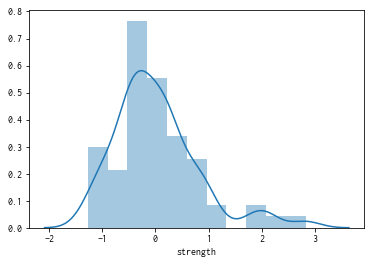

In [69]:
sns.distplot(rikishi_df['strength'])

In [50]:
la1 = fit.extract()

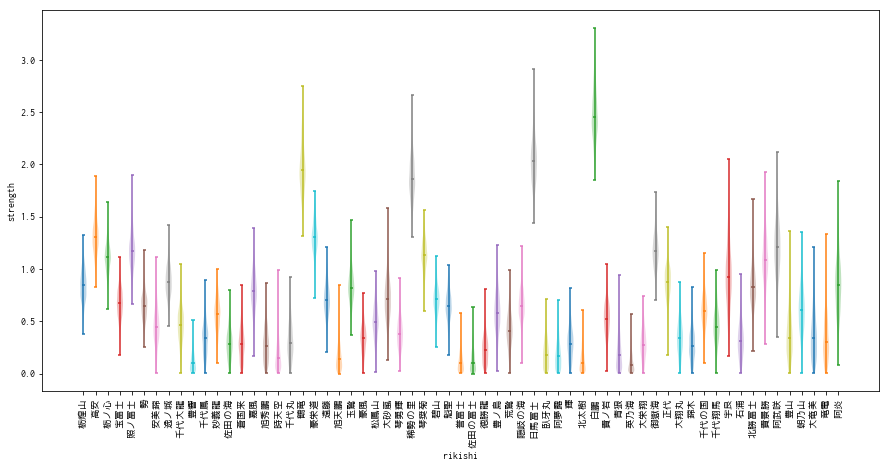

In [51]:
plt.figure(figsize=(15,7))
cmap = plt.cm.get_cmap('tab10')

for i in range(len(rikishi_id.keys())):
    g = plt.violinplot(la1['strength'][:, i], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(len(rikishi_id.keys()))), rikishi_id.keys())
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('strength')
plt.savefig('output/rikishi_bayes_5years', dpi=200)
plt.show()

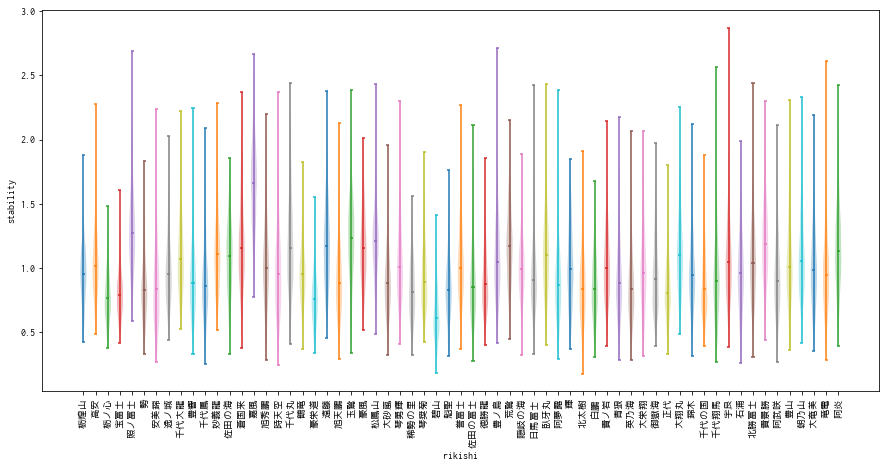

In [58]:
plt.figure(figsize=(15,7))
cmap = plt.cm.get_cmap('tab10')

for i in range(len(rikishi_id.keys())):
    g = plt.violinplot(la1['stability'][:, i], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(len(rikishi_id.keys()))), rikishi_id.keys())
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('stability')
#plt.savefig('output/rikishi_bayes_5years', dpi=200)
plt.show()

In [53]:
len(la1['strength'][:, 1])

1200